The center of the enclosing circle is at coordinates: (1133, 1133)


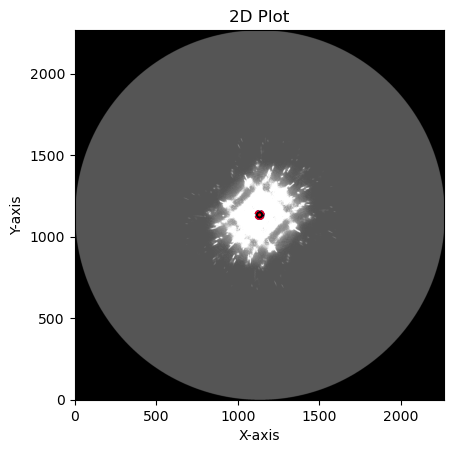

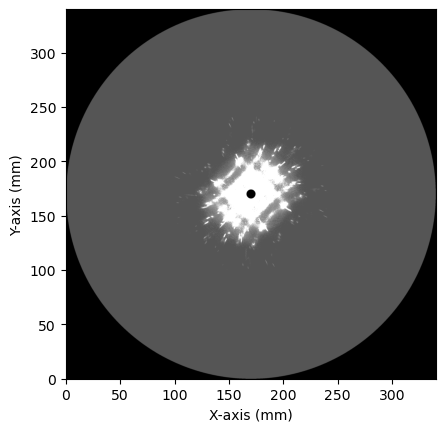

In [7]:
## Image Plate Diffraction System ##

## Image Analysis (Version 1.1) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 2.12.2023 ##

%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

class ImageClicker:
    def __init__(self, image_path):
        self.image = np.array(Image.open(image_path))
        self.grayscale_image = np.mean(self.image, axis=2)
        self.fig, self.ax = plt.subplots()
        self.im = self.ax.imshow(self.grayscale_image, cmap='gray', origin='lower')
        self.coords = []

        self.ax.set_title('2D Plot')
        self.ax.set_xlabel('X-axis')
        self.ax.set_ylabel('Y-axis')

        # Find the enclosing circle around points with minimum intensity
        self.center, radius = self.find_center_and_enclosing_circle()
        print(f'The center of the enclosing circle is at coordinates: ({self.center[0]}, {self.center[1]})')

        # Display the center and circles on the plot
        self.draw_circle(self.center[0], self.center[1], radius)

        # Draw the red disk on the plot
        red_disk_patch = patches.Circle((self.center[0], self.center[1]), radius, color='red', fill=False, linestyle='dashed')
        self.ax.add_patch(red_disk_patch)

    def find_center_and_enclosing_circle(self):
        # Define the region of interest (ROI)
        x_max, y_max = self.grayscale_image.shape
        roi_x_start, roi_x_end = x_max // 4, int(x_max / 1.5)
        roi_y_start, roi_y_end = y_max // 4, int(y_max / 1.5)

        # Extract the ROI from the grayscale image
        roi = self.grayscale_image[roi_x_start:roi_x_end, roi_y_start:roi_y_end]

        # Find the coordinates of points with minimum intensity in the ROI
        min_intensity_coords = np.argwhere(roi == np.min(roi))

        # Shift the coordinates back to the original image coordinates
        min_intensity_coords[:, 0] += roi_x_start
        min_intensity_coords[:, 1] += roi_y_start

        # Find the enclosing circle
        _, radius = cv2.minEnclosingCircle(min_intensity_coords.astype(np.float32))
        return tuple(map(int, min_intensity_coords.mean(axis=0))), int(radius)


    def draw_circle(self, center_x, center_y, radius):
        # Display the center and circle on the plot
        center_marker = plt.Circle((center_x, center_y), 5, color='red', fill=True)
        disk_patch = patches.Circle((center_x, center_y), radius, color='blue', fill=False, linestyle='dashed')

        self.ax.add_patch(center_marker)
        self.ax.add_patch(disk_patch)
        
    def create_mm_plot(self, outer_radius_mm):
        # Υπολογισμός του μεγέθους του pixel σε mm για τους δύο άξονες
        mm_per_pixel_x = (2 * outer_radius_mm) / self.grayscale_image.shape[1]
        mm_per_pixel_y = (2 * outer_radius_mm) / self.grayscale_image.shape[0]

        # Δημιουργία του διαγράμματος
        fig, ax = plt.subplots()

        # Δημιουργία του numpy array με τις τιμές έντασης σε mm
        mm_intensity_array = np.zeros_like(self.grayscale_image, dtype=float)
        for x, row in enumerate(self.grayscale_image):
            for y, intensity in enumerate(row):
                # Υπολογισμός της ακτίνας για την κάθε θέση
                radius = np.sqrt((x - self.center[0]) ** 2 + (y - self.center[1]) ** 2)
                # Υπολογισμός του αντίστοιχου pixel σε mm
                mm_x = x * mm_per_pixel_x
                mm_y = y * mm_per_pixel_y
                # Αποθήκευση της τιμής έντασης στο αντίστοιχο σημείο
                mm_intensity_array[x, y] = intensity

        # Εμφάνιση του διαγράμματος
        ax.imshow(mm_intensity_array, cmap='gray', origin='lower', extent=[0, 2 * outer_radius_mm, 0, 2 * outer_radius_mm])
        ax.set_xlabel('X-axis (mm)')
        ax.set_ylabel('Y-axis (mm)')
        plt.show()

# Καλέστε την create_mm_plot με την επιθυμητή ακτίνα σε mm
outer_radius_mm = 10  # Τοποθετήστε την επιθυμητή ακτίνα σε mm εδώ

# Call the class for the main image
main_image_path = 'C:/Users/sapd/Desktop/IPDS Images Results/DCSQI_annealed_40mm_240min_om0_ph10rpm_201223.tif'
clicker = ImageClicker(main_image_path)
outer_radius_mm = 170  # Τοποθετήστε την επιθυμητή ακτίνα σε mm εδώ
clicker.create_mm_plot(outer_radius_mm)
plt.show()
